In [25]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

https://visgraf.github.io/tcv-2026/mg-tarefas.pdf

# Modelo Geométrico Esfera Geodésica

Dado um sólido de faces triangulares, queremos criar um modelo geométrico no formato OBJ para uma esfera geodésica.  

A ideia é refinar o sólido cada vez mais para ficar próximo de uma esfera. Para isso, para cada uma das faces (triangulos) do sólido, dividimos em outros 4 triangulos. Além disso, projetamos esses pontos na esfera unitária para ter o seu formato.

### Funções

Funções para ler um arquivo OBJ e escrever um arquivo OBJ

In [26]:
#Função para ler um arquivo OBJ
def read_obj(file):
    vertices = []
    faces = []

    with open(file, 'r') as f:

        for line in f:
            parts = line.split()

            if parts[0] == 'v':
                x, y, z = map(float, parts[1:4])
                vertices.append([x, y, z])
            
            elif parts[0] == 'f':
                v1, v2, v3 = map(int, parts[1:4])
                faces.append([v1-1, v2-1, v3-1])

    return vertices, faces

#Função para escrever um arquivo OBJ a partir dos vértices e faces
def write_obj(vertices, faces, name='refined_OBJ'):

    with open(name+'.txt', 'w') as f:
        for v in vertices:
            f.write(f'v {v[0]} {v[1]} {v[2]}\n')

        for face in faces:
            f.write(f'f {face[0]+1} {face[1]+1} {face[2]+1}\n')

Função para normalizar os pontos

In [27]:
#Dado um ponto, normaliza
def normalize(v):
    x, y, z = v

    d = math.sqrt(x**2 + y**2 + z**2)
    return [x/d, y/d, z/d]

Função para calcular o ponto médio entre dois pontos.

Aqui foi utilizado um hash que salva os pontos que já foram calculados os pontos médios, pois pode acontecer de repetir os pontos e dar problema na hora do refinamento.

In [28]:
def middle(i, j, vertices, vin):
    '''
    Função para encontrar o ponto médio entre dois pontos
    Parâmetros:
    i, j: pontos que queremos encontrar o ponto médio
    vertices: lista de vertices
    vin: hash com os vértices que já foram visitados

    Retorno:
    Indice do vértice que está no ponto médio
    '''

    key = (min(i, j), max(i, j))

    #Se o vértice já foi calculado como ponto médio
    if key in vin:
        return vin[key]
    
    v1 = vertices[i]
    v2 = vertices[j]

    meio = [(v1[0] + v2[0]) / 2, (v1[1] + v2[1]) / 2, (v1[2] + v2[2]) / 2]
    meio = normalize(meio)

    vertices.append(meio)
    vin[key] = len(vertices) - 1

    return len(vertices) - 1

Função que faz o refinamento do sólido.

Calcula o ponto médio entre os vértices, normaliza esses pontos e divide o triângulo em outros 4 triângulos.

In [29]:
#Função de refinamento do sólido
def refinement(vertices, faces):
    new_faces = []
    vin = {}

    for a, b, c in faces:

        #Ponto médio de cada aresta
        ab = middle(a, b, vertices, vin)
        bc = middle(b, c, vertices, vin)
        ca = middle(c, a, vertices, vin)

        #Adicionar os 4 triângulos
        new_faces.append([a, ab, ca])
        new_faces.append([ab, b, bc])
        new_faces.append([ab, ca, bc])
        new_faces.append([ca, bc, c])

    return vertices, new_faces

Função para plotar o sólido.

In [30]:
def plot_refinement(vertices=[], faces=[], name=None):
    if name:
        vertices, faces = read_obj(name)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    mesh = [[vertices[i] for i in face] for face in faces]
    ax.add_collection3d(
        Poly3DCollection(mesh, alpha=0.6, edgecolor="k")
    )

    ax.set_box_aspect([1, 1, 1])
    plt.show()

Função principal que faz tudo.  

Dado um arquivo OBJ, vai refinar o sólido, escrever outro arquivo OBJ desse sólido e plota o gráfico.

In [31]:
def sphere(obj, new_obj='new_obj', level=1, plot=False):

    vertices, faces = read_obj(obj)

    vertices = [normalize(v) for v in vertices]

    plot_refinement(vertices, faces)

    for _ in range(level):
        vertices, faces = refinement(vertices, faces)

        write_obj(vertices, faces, new_obj)

        plot_refinement(vertices, faces)

### Plot refinamento

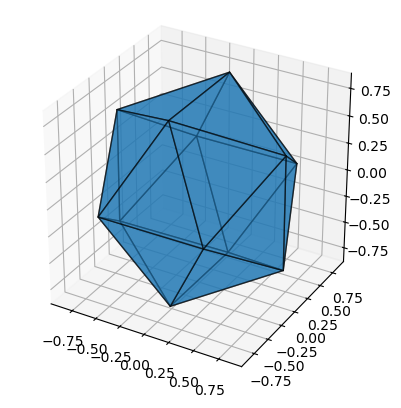

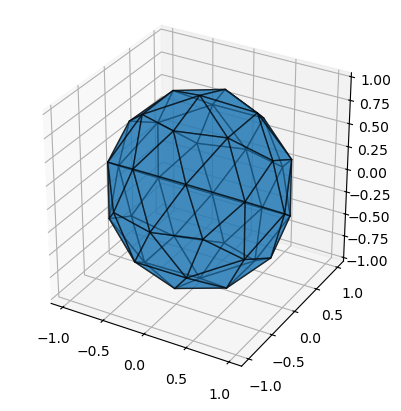

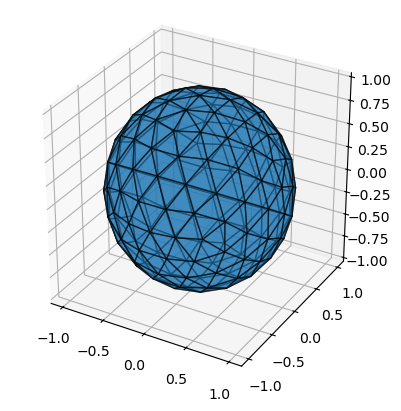

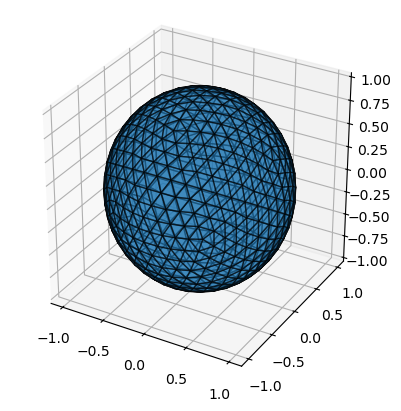

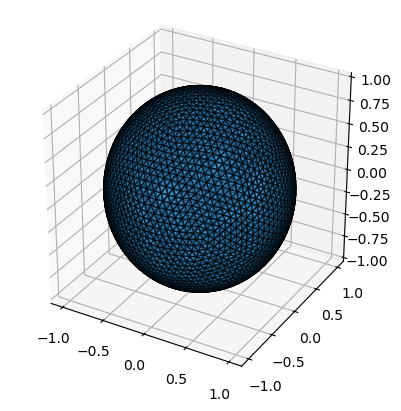

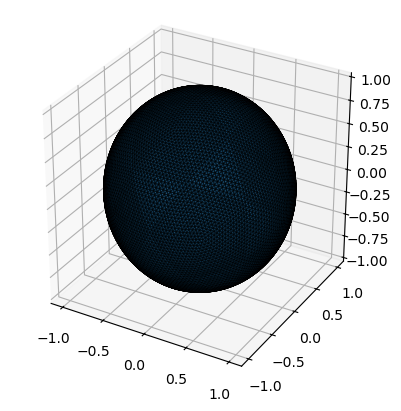

In [33]:
sphere('OBJ.txt',plot=True, level=5)